# Knapsack problem
Following Kleinberg and Tardos


## Problem Description:
Given a set of items, each with a specific weight and value, determine the combination of items to include in a knapsack so that the total weight is less than or equal to a given weight limit and the total value is maximized. The caveat is that each item can either be included in its entirety or completely excluded, but it cannot be broken into smaller portions.



## Algorithm Description
A dynamic algorithm

In [13]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from itertools import combinations
import matplotlib.patches as patches

## Choose colors

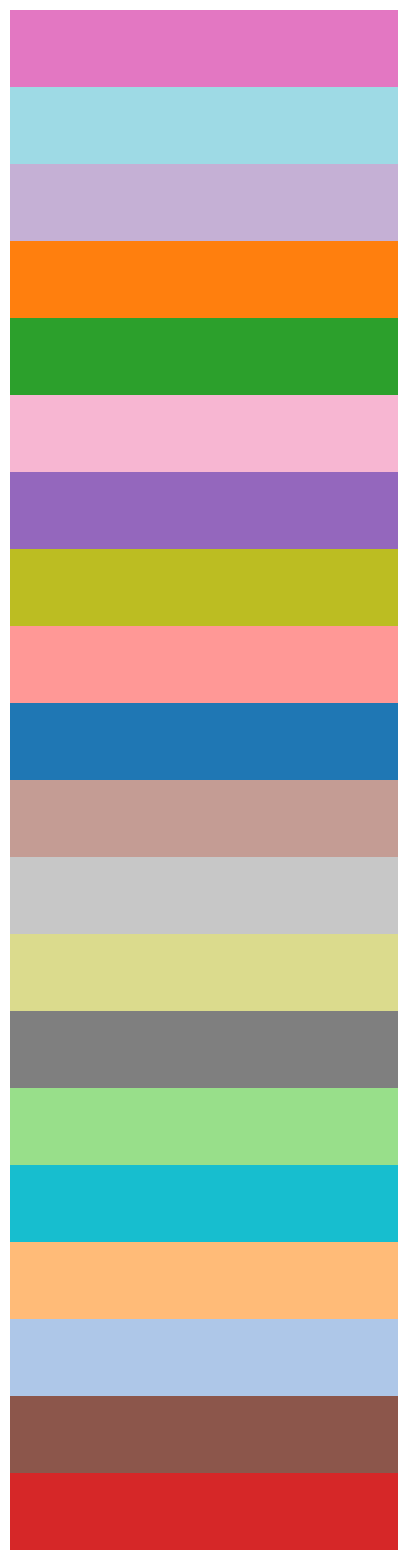

In [67]:
cmap = plt.cm.tab20
colors = [cmap(i) for i in range(20)]
random.shuffle(colors)
          
def display_colors(color_list):
    # Create figure and axes
    fig, ax = plt.subplots(figsize=(5, len(color_list)))

    # Display each color as a rectangle
    for idx, color in enumerate(color_list):
        rect = patches.Rectangle((0, idx), 5, 1, linewidth=1, edgecolor='none', facecolor=color)
        ax.add_patch(rect)

    # Adjust the view
    ax.set_xlim(0, 3)
    ax.set_ylim(0, len(color_list))
    ax.axis('off')  # Hide the axis
    plt.show()
display_colors(colors)

## Generate instances

In [17]:
def generate_items(number_of_items=40,min_value=1,max_value=20,min_weight=1,max_weight=30):
    ans=[]
    for i in range(number_of_items):
        line=dict()
        line["weight"]=np.random.choice(range(min_weight,max_weight))
        line["value"]=np.random.choice(range(min_value,max_value))
        #line["index"]=i
        ans.append(line)

    return ans

In [18]:
generate_items()

[{'weight': 7, 'value': 2},
 {'weight': 10, 'value': 1},
 {'weight': 14, 'value': 18},
 {'weight': 23, 'value': 19},
 {'weight': 29, 'value': 19},
 {'weight': 13, 'value': 5},
 {'weight': 13, 'value': 3},
 {'weight': 17, 'value': 19},
 {'weight': 4, 'value': 16},
 {'weight': 7, 'value': 12},
 {'weight': 24, 'value': 7},
 {'weight': 5, 'value': 4},
 {'weight': 24, 'value': 8},
 {'weight': 28, 'value': 12},
 {'weight': 5, 'value': 17},
 {'weight': 21, 'value': 18},
 {'weight': 26, 'value': 4},
 {'weight': 19, 'value': 2},
 {'weight': 13, 'value': 9},
 {'weight': 24, 'value': 13},
 {'weight': 6, 'value': 8},
 {'weight': 13, 'value': 8},
 {'weight': 15, 'value': 12},
 {'weight': 24, 'value': 2},
 {'weight': 10, 'value': 11},
 {'weight': 23, 'value': 8},
 {'weight': 18, 'value': 8},
 {'weight': 7, 'value': 2},
 {'weight': 3, 'value': 4},
 {'weight': 3, 'value': 17},
 {'weight': 28, 'value': 6},
 {'weight': 19, 'value': 16},
 {'weight': 16, 'value': 9},
 {'weight': 23, 'value': 9},
 {'weight

## Weigh Function

In [21]:
def value(items):
    return sum([item["value"] for item in items])

## Value function

In [23]:
def weight(items):
    return sum([item["weight"] for item in items])

## A dynamic algorithm for Knapsack

In [37]:
def dynamic_knapsack(items,W):
    N=len(items)
     #Initialize the answers dict
    answers=dict()
    for w in range(W+1):
        answers[-1,w]=[]
    for i in range(N):
        answers[i,0]=[]
    ## The recursive part
    for i in range(N):
        for w in range(1,W+1):
            A=answers[i-1,w]
            if items[i]["weight"]>w:
                B=[]
            else:
                B=answers[i-1,w-items[i]["weight"]]+[i]
            ans=A
            if value([items[l] for l in B])> value([items[l] for l in A]) and weight([items[l] for l in B])<=w:
                ans=B
            answers[i,w]=ans
    return answers   


## Compute frames

In [42]:
def compute_frames(items,W):
    N = len(items)
    solutions = dynamic_knapsack(items, W)  # Assuming dynamic_knapsack is defined elsewhere
    for (index,limit) in solutions.keys():
        solutions[index,limit]=[items[i]["weight"]for i in solutions[index,limit]]
    frames=[]
    for w in range(W):
        newframe=[solutions[i,w] for i in range(N)]
        frames.append(newframe)
    return frames


## Animate the knapsack problem

In [93]:
def animate_knapsack(items, W):
    N = len(items)
    data=compute_frames(items,W)
    
    #colors = ['red', 'green', 'blue']  # Modify as needed based on the number of segments

    fig, ax = plt.subplots()

    # format figure
    fig.set_facecolor('black')
    ax.set_facecolor('black')
    

    def animate(i):
        ax.clear()
        ax.set_xlabel("Items used")
        ax.set_ylabel("Weight")
        ax.set_title(f"Knapsack Problem",color="white")
        ax.set_xlim(0, N+1)   # Setting x-axis limits
        ax.set_ylim(0, W+1)   # Setting y-axis limits
        ax.tick_params(left=False, bottom=False, labelbottom=True, labelleft=True, colors='white')
        
        counter_text = ax.text(1, i/W, f"W= {i}", transform=ax.transAxes, ha='left', va='top',color="white",fontsize=13)# Make a counter
        # Set axis colors:
        ax.spines['bottom'].set_color('white')
        ax.spines['left'].set_color('white')
        #ax.spines['right'].set_visible(False)  # Hide right spine
        #ax.spines['top'].set_visible(False)    # Hide top spine
        frame_data = data[i]
        ax.axhline(i, color='palegreen', linestyle='--')
        n_bars = len(frame_data)

        # Define a list of distinct colors. Here's a sample list; expand it as needed:
        #colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'cyan', 'magenta']

        for idx, bar_data in enumerate(frame_data):
            bottom = 0
            for segment_idx, segment_height in enumerate(bar_data):
                color = colors[segment_idx % len(colors)]  # Cycle through colors
                ax.bar(idx, segment_height, bottom=bottom, color=color)
                bottom += segment_height


    ani = FuncAnimation(fig, animate, frames=len(data), repeat=True, blit=False)
    return HTML(ani.to_jshtml())

In [90]:
items=generate_intervals()

RuntimeError: The animation function must return a sequence of Artist objects.

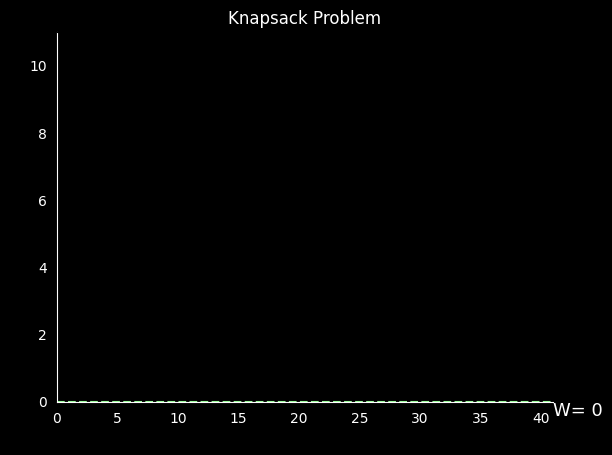

In [92]:
animate_knapsack(items,10)